In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
df = load_digits()
y = df.target[0]
y

0

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
data = df['data'][0]

In [6]:
#Reshape numbers to view as a matrix
data = data.reshape(8,8)

data

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

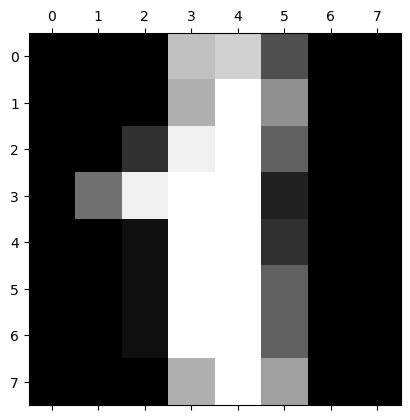

In [7]:
#Plot the digits in matplotlib
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(df['data'][1].reshape(8, 8))

In [8]:
#Create a dataframe
data = pd.DataFrame(df.data)
data.head()

y = df['target']
x = data

In [9]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [10]:
#Train test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

In [11]:
#Import logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9722222222222222

In [12]:
#Now we will use PCA to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(0.95)

x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [13]:
pca.explained_variance_ratio_
pca.n_components_
x_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [14]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9611111111111111

In [16]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [17]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])